In [19]:
%matplotlib inline

from PIL import Image
from matplotlib.pyplot import imshow
from torchvision import models, transforms
from torch.autograd import Variable
from torch.nn import functional as F
from torch import topk
import numpy as np
import skimage.transform
import cv2

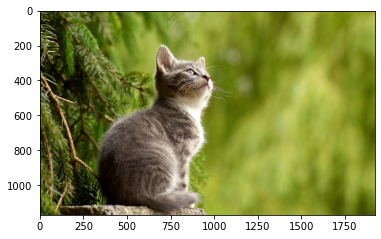

In [2]:
image = Image.open('casper2.jpg')
imshow(image)

In [20]:
import os
image_dir = os.path.join(os.getenv('HOME'),'covid_data/CXR')
image_dir = os.path.join(image_dir,'val/covid-19/COVID-19(116).png')
image_dir

'/home/aiffel0042/covid_data/CXR/val/covid-19/COVID-19(116).png'

In [23]:
a = cv2.imread(image_dir)
a.shape

(1024, 1024, 3)

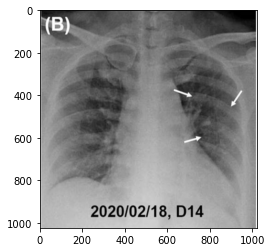

In [28]:
org_img = Image.fromarray(a)
imshow(org_img)

In [29]:
aug_img = aug_f(org_img)
aug_img.shape

torch.Size([3, 1024, 1024])

In [30]:
dir(aug_img)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rfloordiv__',
 '__rmul__',
 '__rpow__',
 '__rshift__',
 '__rsub__',
 '__r

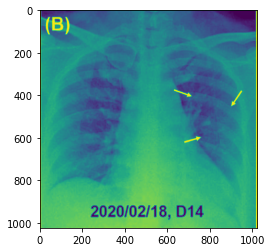

In [14]:
image = Image.open(image_dir)
imshow(image)

In [17]:
dir(image)

['_Image__transformer',
 '_PngImageFile__fp',
 '_PngImageFile__frame',
 '_PngImageFile__idat',
 '_PngImageFile__prepare_idat',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close__fp',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_get_safe_box',
 '_getexif',
 '_min_frame',
 '_new',
 '_open',
 '_repr_png_',
 '_seek',
 '_seek_check',
 '_size',
 '_text',
 'alpha_composite',
 'category',
 'close',
 'convert',
 'copy',
 'crop',
 'custom_mimetype',
 'decoderconfig',
 'decodermaxblock',
 'def

In [5]:
aug_f = transforms.ToTensor()

In [18]:
aug_image = aug_f(image)
aug_image.shape

torch.Size([1, 1024, 1024])

In [56]:
preprocess_covid = transforms.Compose([
    transforms.Resize(280),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [60]:
import os
image_dir = os.path.join(os.getenv('HOME'),'covid_data/CXR')
image_dir = os.path.join(image_dir,'val/normal/0aa5abc0-7db8-44d4-b3b7-8133787e0862.png')
image_dir

'/home/aiffel0042/covid_data/CXR/val/normal/0aa5abc0-7db8-44d4-b3b7-8133787e0862.png'

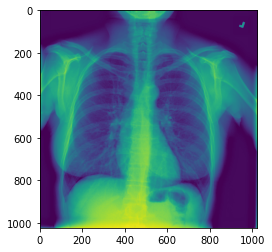

In [61]:
image_covid = Image.open(image_dir)
imshow(image_covid)

In [ ]:
test = transforms.ToTensor()

In [59]:
tensor = preprocess_covid(image_covid)

In [48]:
# Imagenet mean/std

normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)

# Preprocessing - scale to 224x224 for model, convert to tensor, 
# and normalize to -1..1 with mean/std for ImageNet

preprocess = transforms.Compose([
   transforms.Resize((224,224)),
   transforms.ToTensor(),
   normalize
])
.join(data_dir, x),
                                          data_tr
display_transform = transforms.Compose([
   transforms.Resize((224,224))])

In [53]:
tensor = preprocess(image_covid)
tensor

RuntimeError: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]

In [5]:
# Imagenet mean/std

normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)

# Preprocessing - scale to 224x224 for model, convert to tensor, 
# and normalize to -1..1 with mean/std for ImageNet

preprocess = transforms.Compose([
   transforms.Resize((224,224)),
   transforms.ToTensor(),
   normalize
])

display_transform = transforms.Compose([
   transforms.Resize((224,224))])

In [6]:
tensor = preprocess(image)

In [7]:
tensor.shape

torch.Size([3, 224, 224])

In [8]:
a = tensor.unsqueeze(0).cuda() # 차원추가
a.shape

torch.Size([1, 3, 224, 224])

In [9]:
prediction_var = Variable((tensor.unsqueeze(0)).cuda(), requires_grad=True)

In [10]:
model = models.resnet18(pretrained=True)

In [27]:
model.cuda()
model.eval()
print()

In [13]:
class SaveFeatures():
    features=None
    def __init__(self, m): self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output): self.features = ((output.cpu()).data).numpy()
    def remove(self): self.hook.remove()

In [14]:
final_layer = model._modules.get('layer4')
final_layer

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsample): Sequential(
      (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): BasicBlock(
    (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1

In [15]:
activated_features = SaveFeatures(final_layer)
activated_features

In [16]:
prediction = model(prediction_var)
pred_probabilities = F.softmax(prediction).data.squeeze()
activated_features.remove()

<ipython-input-16-5893ac2c4294>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


In [17]:
topk(pred_probabilities,1)

torch.return_types.topk(
values=tensor([0.2430], device='cuda:0'),
indices=tensor([282], device='cuda:0'))

In [18]:
def getCAM(feature_conv, weight_fc, class_idx):
    _, nc, h, w = feature_conv.shape
    cam = weight_fc[class_idx].dot(feature_conv.reshape((nc, h*w)))
    cam = cam.reshape(h, w)
    cam = cam - np.min(cam)
    cam_img = cam / np.max(cam)
    return [cam_img]

In [19]:
weight_softmax_params = list(model._modules.get('fc').parameters())
weight_softmax = np.squeeze(weight_softmax_params[0].cpu().data.numpy())

In [20]:
class_idx = topk(pred_probabilities,1)[1].int()

In [21]:
overlay = getCAM(activated_features.features, weight_softmax, class_idx )

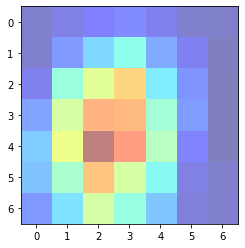

In [22]:
imshow(overlay[0], alpha=0.5, cmap='jet')

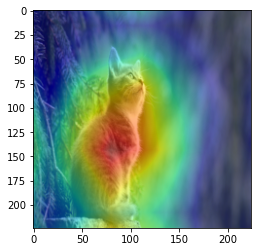

In [23]:
imshow(display_transform(image))
imshow(skimage.transform.resize(overlay[0], tensor.shape[1:3]), alpha=0.5, cmap='jet');

In [24]:
class_idx = topk(pred_probabilities,2)[1].int()
class_idx

tensor([282, 383], device='cuda:0', dtype=torch.int32)

In [25]:
overlay = getCAM(activated_features.features, weight_softmax, 383 )

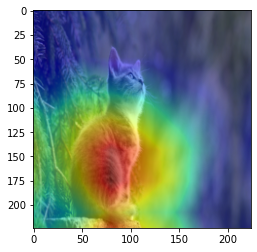

In [26]:
imshow(display_transform(image))
imshow(skimage.transform.resize(overlay[0], tensor.shape[1:3]), alpha=0.5, cmap='jet');